In [1]:
import galprime
galprime.plotting.pyplot_style()
cmap = galprime.plotting.lavender_cmap()

from astropy.io import fits
from astropy.table import Table
from astropy.modeling.models import Sersic2D

from astropy.visualization import ZScaleInterval

import configobj

import numpy as np

from scipy.signal import convolve2d
from scipy.special import gamma

from matplotlib import pyplot as plt

from astropy.visualization import ZScaleInterval

from photutils.background import Background2D

from concurrent.futures import TimeoutError
from pebble import ProcessPool

In [2]:
test = galprime.GPrime("myconfig.gprime", verbose=True)
containers = test.run(max_bins=1)

Loaded 50 cutouts from ../pdata/cutouts_i.fits with shape (451, 451)
Loaded 5800 cutouts from ../pdata/i_psfs.fits with shape (41, 41)
Pruned 0 bins with fewer than 10 objects.


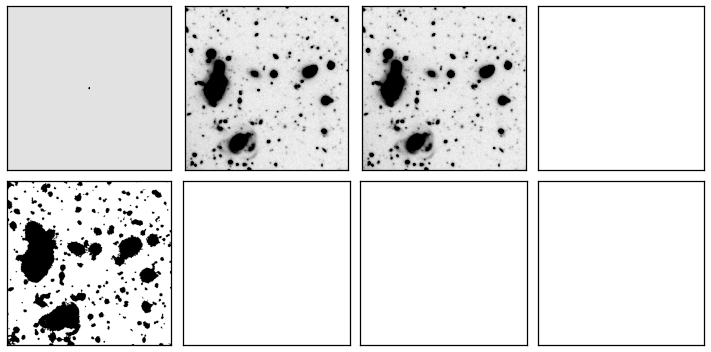

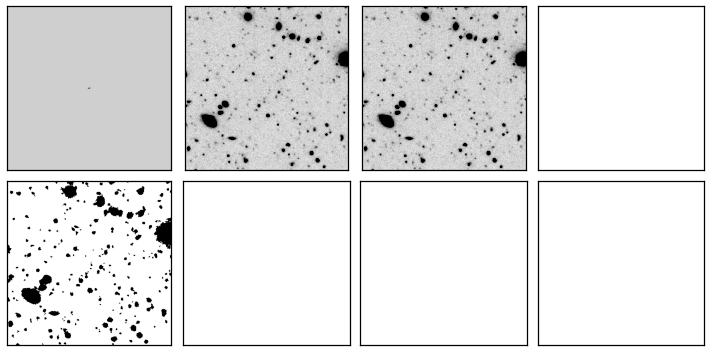

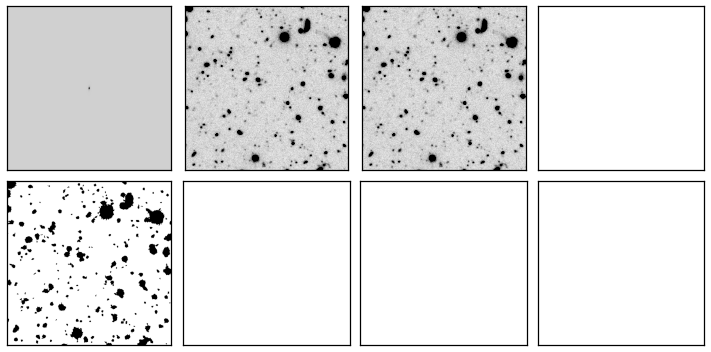

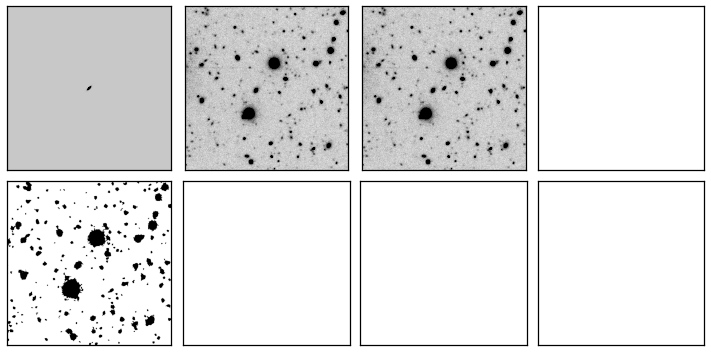

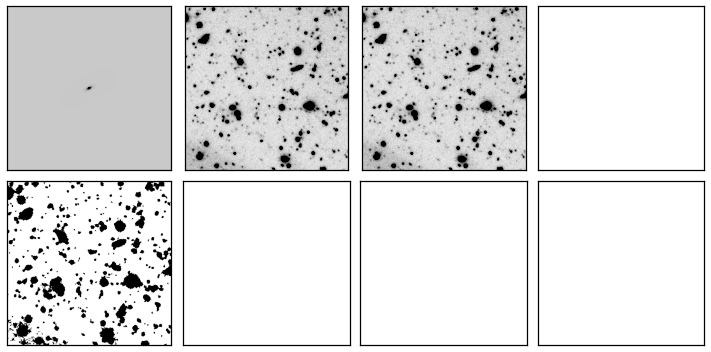

In [3]:
for container in containers:
    container.plot(outdir="temp/")

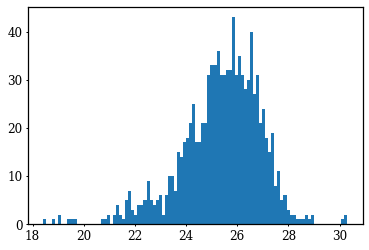

NameError: name 'b_test' is not defined

In [4]:
c = galprime.read_config_file("myconfig.gprime")

if c["FILES"]["MAG_CATALOGUE"] is not None:
    mags = Table.read(f'{c["FILE_DIR"]}{c["FILES"]["MAG_CATALOGUE"]}')
    mags = mags[c["KEYS"]["MAG"]]
    mags = mags[mags > 0]

    mag_kde = galprime.object_kde(mags)
else:
    mags = mag_kde = None

mags_test = mag_kde.resample(size=1000).T

plt.hist(mags_test.flatten(), bins=100)
plt.show()

models = galprime.gen_models(test.config, b_test.to_kde(), n_models=50, mag_kde=mag_kde)
bgs = galprime.Cutouts.from_file(c["FILE_DIR"] + c["FILES"]["BACKGROUNDS"], verbose=True)

for i, mod in enumerate(models.cutouts):
    models.cutouts[i] += bgs.sample()[0]

galprime.plotting.show_cutouts(models, cmap=cmap, method="log", vmin=-2, vmax=3)
plt.show()